### Numpy array vs Python lists

In [33]:
import time 
import matplotlib.pyplot as plt

In [3]:
# speed
# list
a = [i for i in range(10000000)]
b = [i for i in range(10000000,20000000)]

c = []
start = time.time()
for i in range(len(a)):
  c.append(a[i] + b[i])
print(time.time()-start)

2.093430757522583


In [4]:
# numpy
import numpy as np
a = np.arange(10000000)
b = np.arange(10000000,20000000)

start = time.time()
c = a + b
print(time.time()-start)

0.1007084846496582


In [5]:
# memory
a = [i for i in range(10000000)]
import sys

sys.getsizeof(a)

81528048

In [6]:
# convenience
# 1. time less
# 2. memorry less
# 3. more easy

### Advanced Indexing

In [7]:
# Normal Indexing and slicing

a = np.arange(24).reshape(6,4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23]])

In [8]:
a[1,2]

6

In [9]:
a[1:3,1:3]

array([[ 5,  6],
       [ 9, 10]])

In [10]:
# Fancy Indexing

a[:,[0,2,3]]

array([[ 0,  2,  3],
       [ 4,  6,  7],
       [ 8, 10, 11],
       [12, 14, 15],
       [16, 18, 19],
       [20, 22, 23]])

In [11]:
# Boolean Indexing
a = np.random.randint(1,100,24).reshape(6,4)
a

array([[32, 89, 15, 63],
       [98, 79, 94, 79],
       [ 3, 42,  6, 83],
       [55, 95, 73, 62],
       [63, 53, 85, 24],
       [68, 56, 78, 20]])

In [12]:
# find all numbers greater than 50
a[a > 50]

array([89, 63, 98, 79, 94, 79, 83, 55, 95, 73, 62, 63, 53, 85, 68, 56, 78])

In [13]:
# find out even numbers
a[a % 2 == 0]

array([32, 98, 94, 42,  6, 62, 24, 68, 56, 78, 20])

In [14]:
# find all numbers greater than 50 and are even

a[(a > 50) & (a % 2 == 0)]

array([98, 94, 62, 68, 56, 78])

In [15]:
# find all numbers not divisible by 7
a[~(a % 7 == 0)]

array([32, 89, 15, 79, 94, 79,  3,  6, 83, 55, 95, 73, 62, 53, 85, 24, 68,
       78, 20])

### Broadcasting

The term broadcasting describes how NumPy treats arrays with different shapes during arithmetic operations.

The smaller array is “broadcast” across the larger array so that they have compatible shapes.

In [16]:
# same shape
a = np.arange(6).reshape(2,3)
b = np.arange(6,12).reshape(2,3)

print(a)
print(b)

print(a+b)

[[0 1 2]
 [3 4 5]]
[[ 6  7  8]
 [ 9 10 11]]
[[ 6  8 10]
 [12 14 16]]


In [17]:
# diff shape
a = np.arange(6).reshape(2,3)
b = np.arange(3).reshape(1,3)

print(a)
print(b)

print(a+b)

[[0 1 2]
 [3 4 5]]
[[0 1 2]]
[[0 2 4]
 [3 5 7]]


#### Broadcasting Rules

**1. Make the two arrays have the same number of dimensions.**<br>
- If the numbers of dimensions of the two arrays are different, add new dimensions with size 1 to the head of the array with the smaller dimension.<br>

**2. Make each dimension of the two arrays the same size.**<br>
- If the sizes of each dimension of the two arrays do not match, dimensions with size 1 are stretched to the size of the other array.
- If there is a dimension whose size is not 1 in either of the two arrays, it cannot be broadcasted, and an error is raised.

<img src = "https://jakevdp.github.io/PythonDataScienceHandbook/figures/02.05-broadcasting.png">

In [18]:
# More examples

a = np.arange(12).reshape(4,3)
b = np.arange(3)

print(a)
print(b)

print(a+b)

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]
[0 1 2]
[[ 0  2  4]
 [ 3  5  7]
 [ 6  8 10]
 [ 9 11 13]]


In [19]:
a = np.arange(12).reshape(3,4)
b = np.arange(3)

print(a)
print(b)

print(a+b)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[0 1 2]


ValueError: operands could not be broadcast together with shapes (3,4) (3,) 

In [20]:
a = np.arange(3).reshape(1,3)
b = np.arange(3).reshape(3,1)

print(a)
print(b)

print(a+b)

[[0 1 2]]
[[0]
 [1]
 [2]]
[[0 1 2]
 [1 2 3]
 [2 3 4]]


In [21]:
a = np.arange(3).reshape(1,3)
b = np.arange(4).reshape(4,1)

print(a)
print(b)

print(a + b)

[[0 1 2]]
[[0]
 [1]
 [2]
 [3]]
[[0 1 2]
 [1 2 3]
 [2 3 4]
 [3 4 5]]


In [22]:
a = np.array([1])
# shape -> (1,1)
b = np.arange(4).reshape(2,2)
# shape -> (2,2)

print(a)
print(b)

print(a+b)

[1]
[[0 1]
 [2 3]]
[[1 2]
 [3 4]]


In [23]:
a = np.arange(12).reshape(3,4)
b = np.arange(12).reshape(4,3)

print(a)
print(b)

print(a+b)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]


ValueError: operands could not be broadcast together with shapes (3,4) (4,3) 

In [24]:
a = np.arange(16).reshape(4,4)
b = np.arange(4).reshape(2,2)

print(a)
print(b)

print(a+b)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
[[0 1]
 [2 3]]


ValueError: operands could not be broadcast together with shapes (4,4) (2,2) 

### Working with mathematical formulas

In [25]:
a = np.arange(10)
np.sin(a)
#np.sum(a)

array([ 0.        ,  0.84147098,  0.90929743,  0.14112001, -0.7568025 ,
       -0.95892427, -0.2794155 ,  0.6569866 ,  0.98935825,  0.41211849])

In [26]:
# sigmoid
def sigmoid(array):
  return 1/(1 + np.exp(-(array)))


a = np.arange(100)

sigmoid(a)

array([0.5       , 0.73105858, 0.88079708, 0.95257413, 0.98201379,
       0.99330715, 0.99752738, 0.99908895, 0.99966465, 0.99987661,
       0.9999546 , 0.9999833 , 0.99999386, 0.99999774, 0.99999917,
       0.99999969, 0.99999989, 0.99999996, 0.99999998, 0.99999999,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.     

In [27]:
# mean squared error

actual = np.random.randint(1,50,25)
predicted = np.random.randint(1,50,25)

In [28]:
def mse(actual,predicted):
  return np.mean((actual - predicted)**2)

mse(actual,predicted)

261.96

In [29]:
# binary cross entropy
#homeWork

In [30]:
actual

array([13, 44, 41,  3,  6, 19, 19, 42, 14, 14, 37, 10, 41, 16, 32, 24, 23,
       26, 26, 10,  1, 45, 17, 41,  8])

### Working with missing values

In [31]:
# Working with missing values -> np.nan
a = np.array([1,2,3,4,np.nan,6])
a

array([ 1.,  2.,  3.,  4., nan,  6.])

In [32]:
a[~np.isnan(a)]

array([1., 2., 3., 4., 6.])

### Plotting Graphs

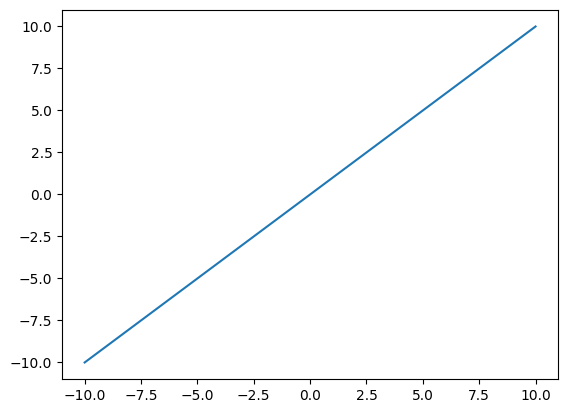

In [34]:
# plotting a 2D plot
# x = y


x = np.linspace(-10,10,100)
y = x

plt.plot(x,y)

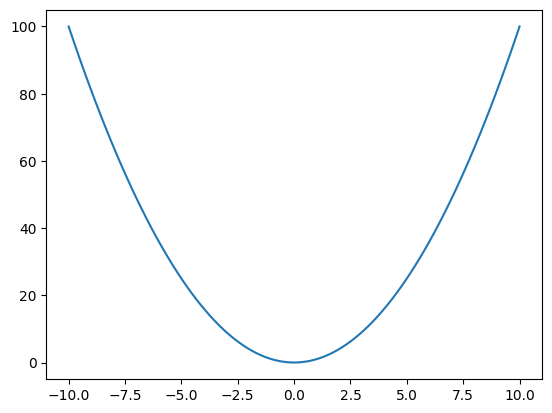

In [35]:
# y = x^2
x = np.linspace(-10,10,100)
y = x**2

plt.plot(x,y)

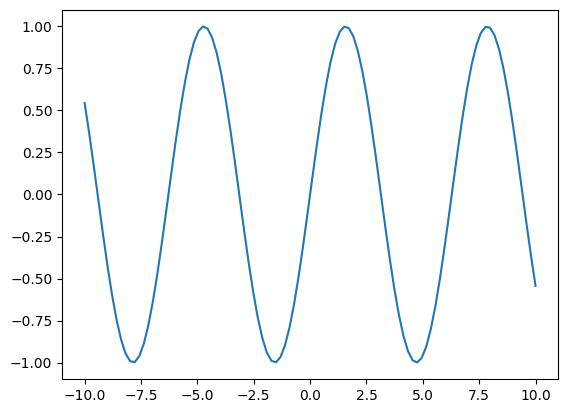

In [36]:
# y = sin(x)
x = np.linspace(-10,10,100)
y = np.sin(x)

plt.plot(x,y)

C:\Users\shafe\AppData\Local\Temp\ipykernel_22964\2564014901.py:3: RuntimeWarning: invalid value encountered in log
  y = x * np.log(x)


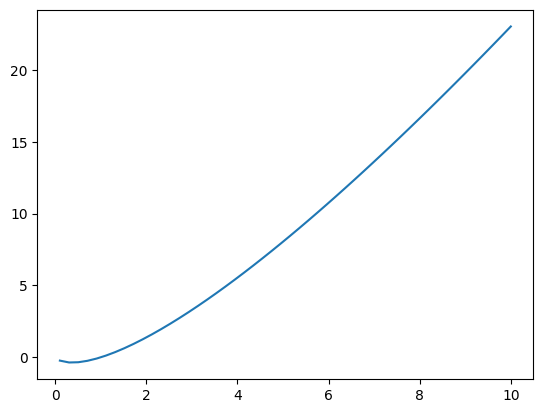

In [37]:
# y = xlog(x)
x = np.linspace(-10,10,100)
y = x * np.log(x)

plt.plot(x,y)

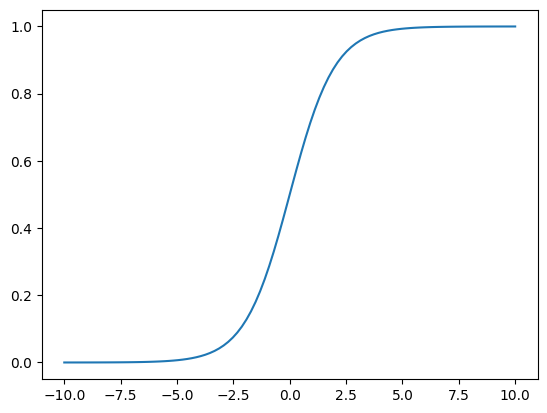

In [38]:
# sigmoid
x = np.linspace(-10,10,100)
y = 1/(1+np.exp(-x))

plt.plot(x,y)

In [39]:
### Meshgrids

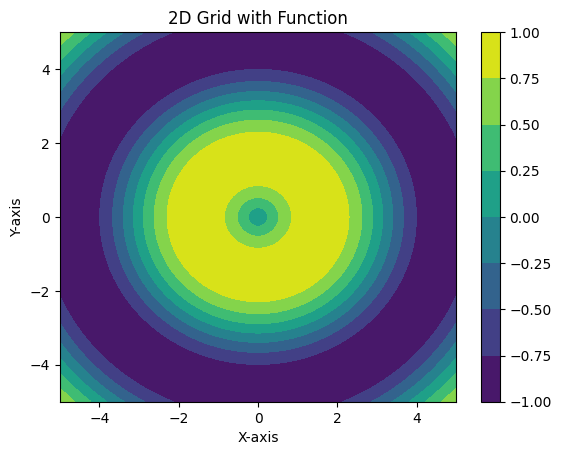

In [40]:
# Create coordinate vectors
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)

# Create a 2D grid
X, Y = np.meshgrid(x, y)

# Compute a function on the grid
Z = np.sin(np.sqrt(X**2 + Y**2))

# Plot the result
plt.contourf(X, Y, Z, cmap='viridis')
plt.colorbar()
plt.title('2D Grid with Function')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()

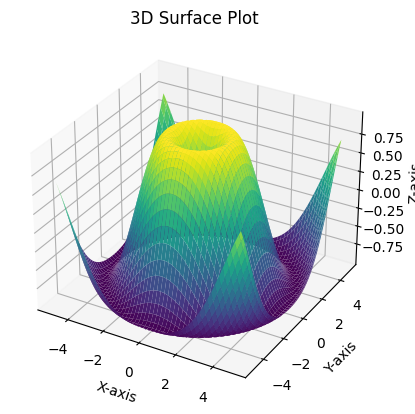

In [41]:
from mpl_toolkits.mplot3d import Axes3D

# Create coordinate vectors
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)

# Create a 2D grid
X, Y = np.meshgrid(x, y)

# Compute a function on the grid
Z = np.sin(np.sqrt(X**2 + Y**2))

# Plot the 3D surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')

ax.set_title('3D Surface Plot')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')

plt.show()